/home/xuchang/Envs/dirac-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/xuchang/Envs/dirac-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Spatial weights calculated. Average neighbors: 30.0
Gene expression weights calculated.
Final weight matrix calculated and stored in adata.obsm['weights_matrix_all']


Finding adjacent spots: 100%|█ [ time l


Step 1: Data augmentation completed
12.0000 neighbors per cell on average.
Step 2: Spatial graph computation completed
Running DeepST analysis...


Pretraining initial model: 100%|█ [ tim
/home/xuchang/Envs/dirac-env/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
Training final model: 100%|█ [ time lef


Step 3: DeepST training completed
Memory usage: 4.44 GB
Total time: 0.42 minutes
Analysis completed successfully
Found resolution: 0.33 for 7 domains


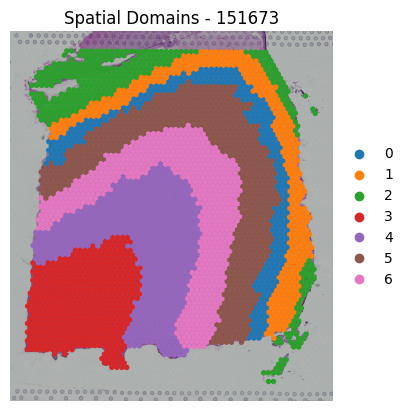

Analysis complete! Results saved to ./Results/151673_domains.pdf


<Figure size 640x480 with 0 Axes>

In [1]:
import os
import matplotlib.pyplot as plt
import scanpy as sc
import deepstkit as dt

# ========== Configuration ==========
SEED = 0                     # Random seed for reproducibility
DATA_DIR = "./data/DLPFC"   # Directory containing spatial data
SAMPLE_ID = "151673"         # Sample identifier to analyze
RESULTS_DIR = "./Results"   # Directory to save outputs
N_DOMAINS = 7                # Expected number of spatial domains

# ========== Initialize Analysis ==========
# Set random seed and initialize DeepST
dt.utils_func.seed_torch(seed=SEED)

# Create DeepST instance with analysis parameters
deepst = dt.main.run(
    save_path=RESULTS_DIR,
    task="Identify_Domain",  # Spatial domain identification
    pre_epochs=500,          # Pretraining iterations
    epochs=500,              # Main training iterations
    use_gpu=True             # Accelerate with GPU if available
)

# ========== Data Loading & Preprocessing ==========
# (Optional) Load spatial transcriptomics data (Visium platform)
# e.g. adata = anndata.read_h5ad("*.h5ad"), this data including .obsm['spatial']
adata = deepst._get_adata(
    platform="Visium",
    data_path=DATA_DIR,
    data_name=SAMPLE_ID
)

# Optional: Incorporate H&E image features (skip if not available)
# adata = deepst._get_image_crop(adata, data_name=SAMPLE_ID)

# ========== Feature Engineering ==========
# Data augmentation (skip morphological if no H&E)
adata = deepst._get_augment(
    adata,
    spatial_type="BallTree",
    use_morphological = False  # Set True if using H&E features
)

# Construct spatial neighborhood graph
graph_dict = deepst._get_graph(
    adata.obsm["spatial"],
    distType="KDTree"        # Spatial relationship modeling
)

# Dimensionality reduction
data = deepst._data_process(
    adata,
    pca_n_comps=200          # Reduce to 200 principal components
)

# ========== Model Training ==========
# Train DeepST model and obtain embeddings
deepst_embed = deepst._fit(
    data=data,
    graph_dict=graph_dict
)
adata.obsm["DeepST_embed"] = deepst_embed

# ========== Spatial Domain Detection ==========
# Cluster spots into spatial domains
adata = deepst._get_cluster_data(
    adata,
    n_domains=N_DOMAINS,     # Expected number of domains
    priori=True              # Use prior knowledge if available
)

# ========== Visualization & Output ==========
# Plot spatial domains
sc.pl.spatial(
    adata,
    color=["DeepST_refine_domain"],  # Color by domain
    frameon=False,
    spot_size=150,
    title=f"Spatial Domains - {SAMPLE_ID}"
)

# Save results
output_file = os.path.join(RESULTS_DIR, f"{SAMPLE_ID}_domains.pdf")
plt.savefig(output_file, bbox_inches="tight", dpi=300)
print(f"Analysis complete! Results saved to {output_file}")

/home/xuchang/Envs/dirac-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/xuchang/Envs/dirac-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Spatial weights calculated. Average neighbors: 30.0
Gene expression weights calculated.
Final weight matrix calculated and stored in adata.obsm['weights_matrix_all']


Finding adjacent spots: 100%|█ [ time l


Step 1: Data augmentation completed
12.0000 neighbors per cell on average.
Step 2: Spatial graph computation completed


/home/xuchang/Envs/dirac-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/xuchang/Envs/dirac-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Spatial weights calculated. Average neighbors: 30.0
Gene expression weights calculated.
Final weight matrix calculated and stored in adata.obsm['weights_matrix_all']


Finding adjacent spots: 100%|█ [ time l


Step 1: Data augmentation completed
12.0000 neighbors per cell on average.
Step 2: Spatial graph computation completed


/home/xuchang/Envs/dirac-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/xuchang/Envs/dirac-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Spatial weights calculated. Average neighbors: 30.0
Gene expression weights calculated.
Final weight matrix calculated and stored in adata.obsm['weights_matrix_all']


Finding adjacent spots: 100%|█ [ time l


Step 1: Data augmentation completed
12.0000 neighbors per cell on average.
Step 2: Spatial graph computation completed


/home/xuchang/Envs/dirac-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/xuchang/Envs/dirac-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Spatial weights calculated. Average neighbors: 30.0
Gene expression weights calculated.
Final weight matrix calculated and stored in adata.obsm['weights_matrix_all']


Finding adjacent spots: 100%|█ [ time l


Step 1: Data augmentation completed
12.0000 neighbors per cell on average.
Step 2: Spatial graph computation completed


/home/xuchang/Envs/dirac-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/xuchang/Envs/dirac-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/xuchang/Envs/dirac-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Running DeepST analysis...


Pretraining initial model: 100%|█ [ tim
/home/xuchang/Envs/dirac-env/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
Training final model: 100%|█ [ time lef


Step 3: DeepST training completed
Memory usage: 22.04 GB
Total time: 1.58 minutes
Analysis completed successfully
Found resolution: 0.25 for 7 domains


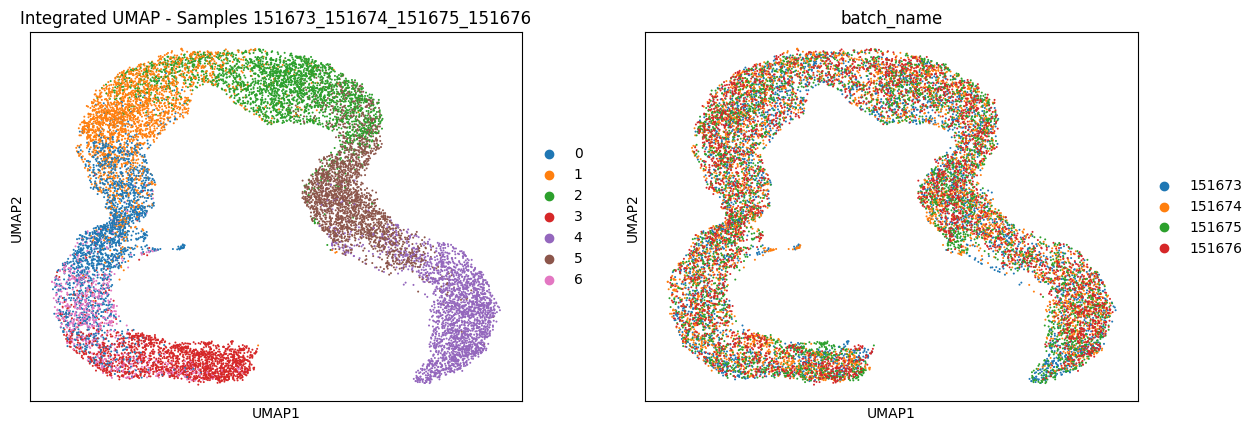

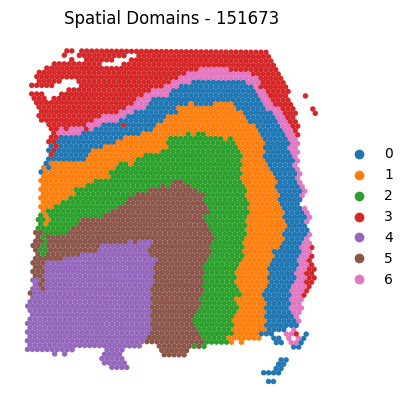

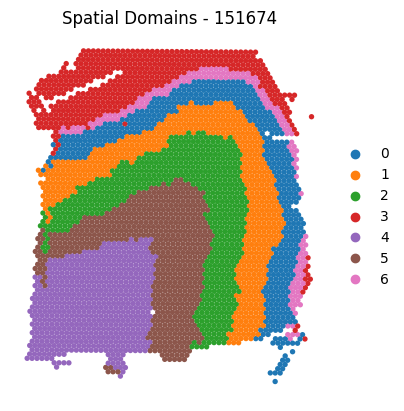

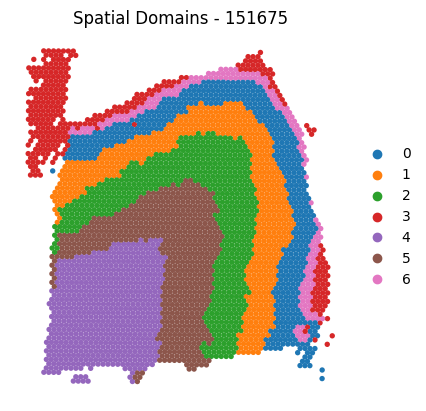

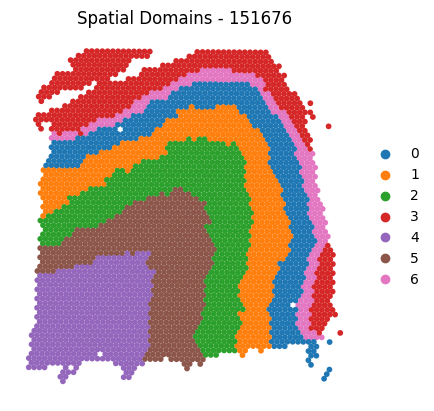

Integration complete! Results saved to ./Results


In [1]:
import os
import matplotlib.pyplot as plt
import scanpy as sc
import deepstkit as dt

# ========== Configuration ==========
SEED = 0  
DATA_DIR = "./data/DLPFC"        
SAMPLE_IDS = ['151673', '151674','151675', '151676']
RESULTS_DIR = "./Results"        
N_DOMAINS = 7                             
INTEGRATION_NAME = "_".join(SAMPLE_IDS)

# ========== Initialize Analysis ==========
# Set random seed and initialize DeepST
dt.utils_func.seed_torch(seed=SEED)

# ========== Initialize DeepST Integration ==========
integration_model = dt.main.run(
    save_path=RESULTS_DIR,
    task="Integration",       # Multi-sample integration task
    pre_epochs=500,           
    epochs=500,              
    use_gpu=True              
)

# ========== Multi-Sample Processing ==========
processed_data = []
spatial_graphs = []

for sample_id in SAMPLE_IDS:
    # Load and preprocess each sample
    adata = integration_model._get_adata(
        platform="Visium",
        data_path=DATA_DIR,
        data_name=sample_id
    )
    
    # Incorporate H&E image features (Optional)
    # adata = integration_model._get_image_crop(adata, data_name=sample_id)
    
    # Feature augmentation
    adata = integration_model._get_augment(
        adata,
        spatial_type="BallTree",
        use_morphological=False, # Use prior knowledge if available
    )
    
    # Construct spatial neighborhood graph
    graph = integration_model._get_graph(
        adata.obsm["spatial"],
        distType="KDTree"
    )
    
    processed_data.append(adata)
    spatial_graphs.append(graph)

# ========== Dataset Integration ==========
# Combine multiple samples into integrated dataset
combined_adata, combined_graph = integration_model._get_multiple_adata(
    adata_list=processed_data,
    data_name_list=SAMPLE_IDS,
    graph_list=spatial_graphs
)

# Dimensionality reduction
integrated_data = integration_model._data_process(
    combined_adata,
    pca_n_comps=200
)

# ========== Integrated Model Training ==========
# Train with domain adversarial learning
embeddings = integration_model._fit(
    data=integrated_data,
    graph_dict=combined_graph,
    domains=combined_adata.obs["batch"].values,  # For batch correction
    n_domains=len(SAMPLE_IDS) )                 # Number of batches

combined_adata.obsm["DeepST_embed"] = embeddings

# ========== Spatial Domain Detection ==========
combined_adata = integration_model._get_cluster_data(
    combined_adata,
    n_domains=N_DOMAINS,
    priori=True,             # Use biological priors if available
    batch_key="batch_name",
)

# ========== Visualization ==========
# UMAP of integrated data
sc.pp.neighbors(combined_adata, use_rep='DeepST_embed')
sc.tl.umap(combined_adata)

# Save combined UMAP plot
umap_plot = sc.pl.umap(
    combined_adata,
    color=["DeepST_refine_domain", "batch_name"],
    title=f"Integrated UMAP - Samples {INTEGRATION_NAME}",
    return_fig=True
)
umap_plot.savefig(
    os.path.join(RESULTS_DIR, f"{INTEGRATION_NAME}_integrated_umap.pdf"),
    bbox_inches='tight',
    dpi=300
)

# Save individual spatial domain plots
for sample_id in SAMPLE_IDS:
    sample_data = combined_adata[combined_adata.obs["batch_name"]==sample_id]
    
    spatial_plot = sc.pl.spatial(
        sample_data,
        color='DeepST_refine_domain',
        title=f"Spatial Domains - {sample_id}",
        frameon=False,
        spot_size=150,
        return_fig=True
    )
    spatial_plot.savefig(
        os.path.join(RESULTS_DIR, f"{sample_id}_domains.pdf"),
        bbox_inches='tight',
        dpi=300
    )

print(f"Integration complete! Results saved to {RESULTS_DIR}")